In [287]:
from datetime import datetime 
from time import process_time
import timeit
import time
import random
import math
import numpy as np
import copy
from matplotlib import pyplot as plt

# a) Merge, Insertion, Hybrid Sort Algo

In [2]:
#Mergesort Function
def mergeSort(myList):
  #Instantiate key comparisons
  noComp = 0;
  totComp = 0;

  #Define length of list
  n = len(myList)

  #Define middle of list
  mid = n//2
  
  if mid<=0:
    #Nothing to compare
    return 0
  else:
    #Split list into 2 using middle
    leftList = myList[:mid]
    rightList = myList[mid:]

    #Sort left and right list
    totComp += mergeSort(leftList)
    totComp += mergeSort(rightList)

    #Initialise counter for main, left and right list
    mainCount = leftCount = rightCount = 0

    #Compare elements in seperated lists and merge into main list
    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        myList[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        myList[mainCount] = rightList[rightCount]
        rightCount += 1

      #Add to key comparisons
      noComp += 1
      totComp += 1

      #Increment count for main list
      mainCount += 1

    #Check for remaining items in both lists
    while leftCount < len(leftList):
      myList[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      myList[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1
    
    #Print number of key comparisons for segment
    #print(myList, ", No. of Key Comparisons: ", noComp)

    return totComp 

In [3]:
def insertionSort(myList):
  #Instantiate key comparisons
  totComp = 0

  #Define length of list
  n = len(myList)

  #Check if length of list is more than 1
  if n >= 1:
    for i in range(n):
      for j in range(i, 0, -1):
        #Increment key comparisons
        totComp += 1
        if myList[j] < myList[j-1]:
          #Swap items in list
          temp = myList[j]
          myList[j] = myList[j-1]
          myList[j-1] = temp
        else:
          break
    return totComp
  else:
    return 0

In [ ]:
#HybridSort Function
def mergeInsertHybrid(myList, S):
  #Copy old list
  #preList = myList[:]

  #Instantiate key comparisons
  noComp = 0;
  totComp = 0;

  #Define length of list
  n = len(myList)

  if n <= S:
    #Insertion Sort
    #Check if length of list is more than 1
    if n > 1:
      for i in range(n):
        for j in range(i, 0, -1):
          #Increment key comparisons
          noComp += 1
          totComp += 1
          if myList[j] < myList[j-1]:
            #Swap items in list
            temp = myList[j]
            myList[j] = myList[j-1]
            myList[j-1] = temp
          else:
            break
    else:
      #Nothing to compare
      return 0
  else:
    #Merge Sort
    #Define middle of list
    mid = n//2

    #Split list into 2 using middle
    leftList = myList[:mid]
    rightList = myList[mid:]

    #Sort left and right list
    totComp += mergeInsertHybrid(leftList, S)
    totComp += mergeInsertHybrid(rightList, S)

    #Initialise counter for main, left and right list
    mainCount = leftCount = rightCount = 0

    #Compare elements in seperated lists and merge into main list
    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        myList[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        myList[mainCount] = rightList[rightCount]
        rightCount += 1

      #Increment key comparisons
      noComp += 1
      totComp += 1

      #Increment count for main list
      mainCount += 1

    #Check for remaining items in both lists
    while leftCount < len(leftList):
      myList[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      myList[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1
    
    #Print number of key comparisons for segment
  #print("Pre: ", preList, "\nPost: ", myList, "\nNo. of Key Comparisons: ", noComp)
  return totComp 

In [4]:
def printList(myList):
  for i in range(len(myList)):
    print(myList[i], end=" ")
  print()

In [295]:
print("Testing...")
print("")
arr = [6,3,8,4,5,8,2,4,5,6,7,8,3,2,5,6]

print("Array:")
printList(arr)
print("")
print("Comparision:", insertionSort(arr)) #mergeInsertHybrid(arr, 5) #mergeSort(arr)

print("")
print("Sorted Array:")
printList(arr)

Testing...

Array:
6 3 8 4 5 8 2 4 5 6 7 8 3 2 5 6 

Comparision: 67

Sorted Array:
2 2 3 3 4 4 5 5 5 6 6 6 7 8 8 8 


# b) GENERATE DATASET 1k to 1000k

In [298]:
def generate_int_dataset(size, range_max):

  dataset = []
  for i in range(size):
    dataset.append(random.randint(0, range_max))
  return dataset

In [302]:
print("Testing...")
print("")

print("Create dataset of size n=100, range: 0-100...")
print("")
print(generate_int_dataset(100, 100))


Testing...

Create dataset of size n=100, range: 0-100...

[27, 33, 22, 99, 25, 14, 37, 73, 26, 15, 74, 78, 3, 39, 6, 65, 99, 63, 86, 4, 67, 5, 47, 45, 51, 88, 29, 60, 82, 81, 4, 66, 61, 86, 87, 83, 79, 62, 100, 5, 25, 85, 36, 43, 27, 61, 4, 0, 64, 16, 33, 33, 84, 35, 46, 10, 3, 4, 85, 94, 1, 58, 39, 3, 19, 77, 88, 41, 3, 78, 88, 81, 58, 39, 17, 88, 39, 2, 28, 69, 60, 98, 8, 50, 17, 74, 82, 86, 27, 1, 70, 20, 43, 61, 24, 27, 20, 74, 92, 35]


In [68]:
def copy_dataset(dataset):
  #Create a new list to store the copied dataset
  copied_dataset = []

  #Loop through the original dataset and add each element to the copied dataset
  for elem in dataset:
    copied_dataset.append(elem)

  #Return the copied dataset
  return copied_dataset

# ci) HYBRIDSORT ANALYSIS: FIXED S

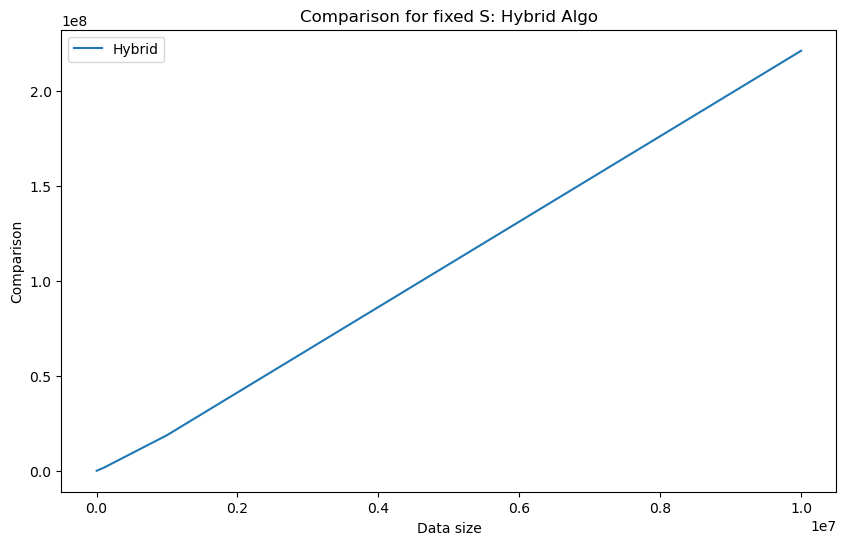

In [246]:
import timeit
import matplotlib.pyplot as plt

def main():
  datacount = [1000, 10000, 100000, 1000000, 10000000]
  s = 5

  hybrid_runtime = []
  hybrid_comparision = []

  #Run the generate_int_dataset() function 5 times for each data size
  for i in range(len(datacount)):
    dataset = generate_int_dataset(datacount[i], datacount[i])

    #Get the runtime for the hybrid, merge, and insertion sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(dataset, s))  
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

  plt.figure(figsize=(10, 6))
  plt.plot(datacount, hybrid_comparision, label="Hybrid")

  plt.xlabel("Data size")
  plt.ylabel("Comparison")
  plt.title("Comparison for fixed S: Hybrid Algo")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

# ci) HYBRIDSORT ANALYSIS: FIXED N

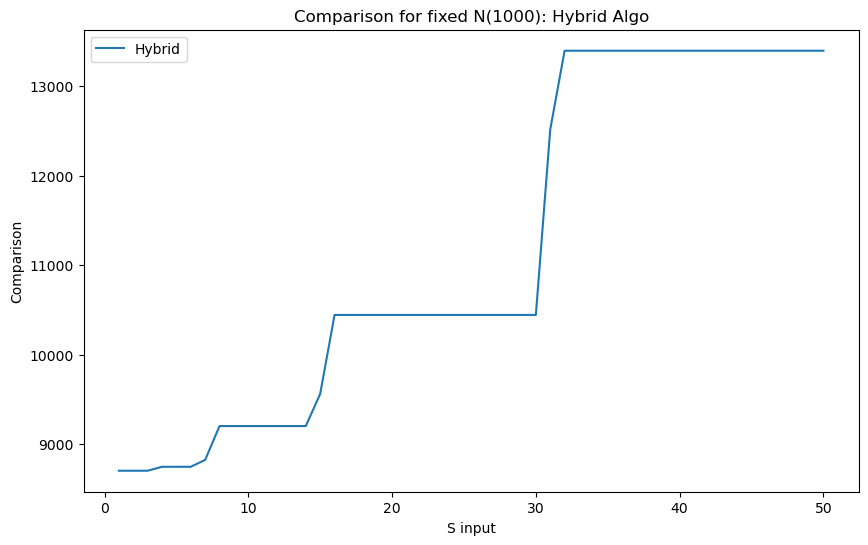

In [271]:
def main():
    
  dataset = generate_int_dataset(1000, 1000)
  
  s = []
  for i in range(1, 51):
    s.append(i)

  hybrid_runtime = []
  hybrid_comparision = []

  #Run the generate_int_dataset() function 5 times for each data size
  for i in range(len(s)):
    #dataset = generate_int_dataset(1000, 1000)

    #Get the runtime for the hybrid, merge, and insertion sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s[i]))  
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

  plt.figure(figsize=(10, 6))
  plt.plot(s, hybrid_comparision, label="Hybrid")

  plt.xlabel("S input")
  plt.ylabel("Comparison")
  plt.title("Comparison for fixed N(1000): Hybrid Algo")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

# c) Conclusion

We know that insertion sort is faster in situation:
- array is already sorted/ nearly sorted
- array is small
- computer has fast cache

From the analysis, we concluded that the optimal range of S is from 0-10.

However there is no formula to get the best S as the situation always differ and depend on the given dataset. an approach will be exhaustive search, given we narrow down the range to 0-10. We will try every possible value of S from 0-10 to find the best S for the given dataset

### Approach: Exhaustive search using S from range 0-10

# Compare Hybridsort with Mergesort using S value of 5

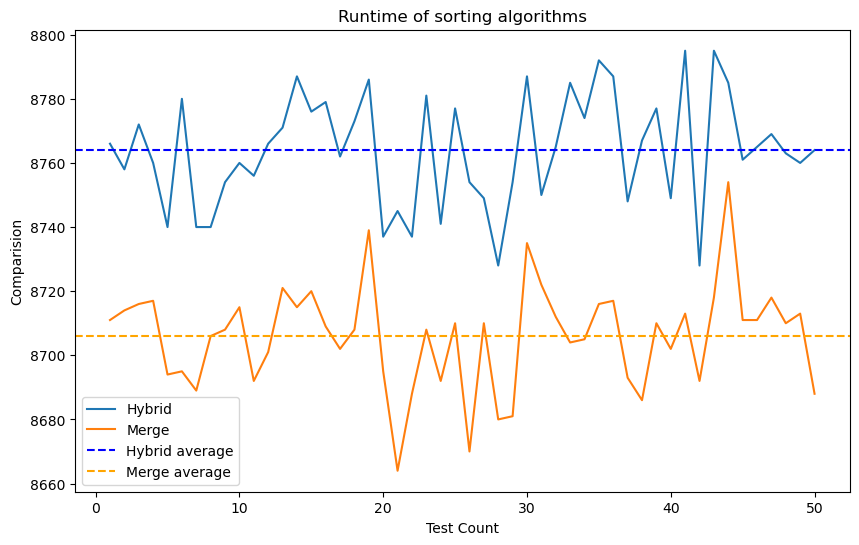

In [303]:
def main():
  dataCount = 1000
  s = 5
  count = [] 
  for i in range(1, 51):
    count.append(i)

  hybrid_runtime = []
  merge_runtime = []
  hybrid_comparision = []
  merge_comparision = []

  #Run the generate_int_dataset() function 5 times for each data size
  for i in range(len(count)):
    dataset = generate_int_dataset(dataCount, dataCount)

    #Get the runtime for the hybrid, merge, and insertion sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s))     
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

    start_time = timeit.default_timer()
    merge_comparision.append(mergeSort(copy.copy(dataset)))  
    end_time = timeit.default_timer()
    merge_runtime.append(round(end_time - start_time, 6))
    
  #Calculate the average runtime for each algorithm
  hybrid_average_runtime = np.mean(hybrid_comparision)
  merge_average_runtime = np.mean(merge_comparision)

  #Plot the runtime of the three algorithms
  plt.figure(figsize=(10, 6))
  plt.plot(count, hybrid_comparision, label="Hybrid")
  plt.plot(count, merge_comparision, label="Merge")

  plt.axhline(hybrid_average_runtime, color="blue", linestyle="--", label="Hybrid average")
  plt.axhline(merge_average_runtime, color="orange", linestyle="--", label="Merge average")

  plt.xlabel("Test Count")
  plt.ylabel("Comparision")
  plt.title("Runtime of sorting algorithms")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()

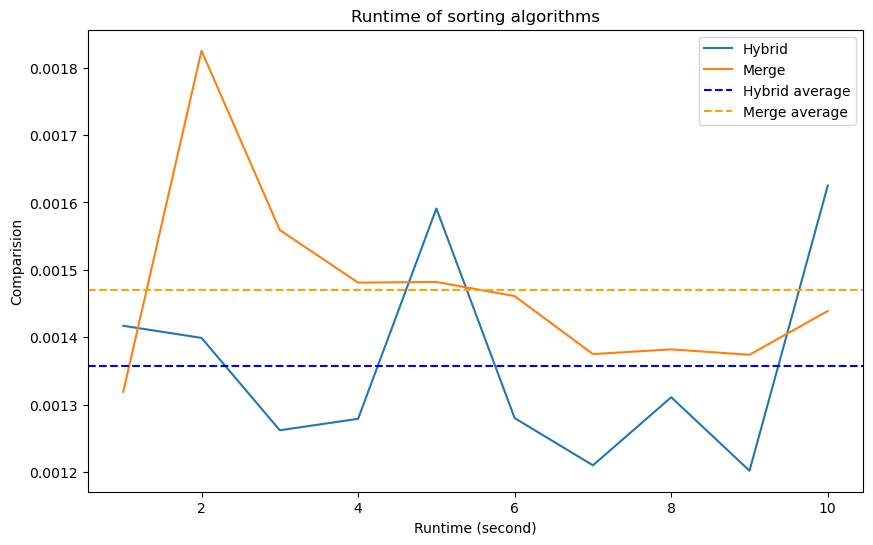

In [304]:
import numpy as np

def main():
  dataCount = 1000
  s = 5
  count = [] 
  for i in range(1, 11):
    count.append(i)

  hybrid_runtime = []
  merge_runtime = []
  hybrid_comparision = []
  merge_comparision = []

  #Run the generate_int_dataset() function 5 times for each data size
  for i in range(len(count)):
    dataset = generate_int_dataset(dataCount, dataCount)

    #Get the runtime for the hybrid, merge, and insertion sort algorithms
    start_time = timeit.default_timer()
    hybrid_comparision.append(mergeInsertHybrid(copy.copy(dataset), s))     
    end_time = timeit.default_timer()
    hybrid_runtime.append(round(end_time - start_time, 6))

    start_time = timeit.default_timer()
    merge_comparision.append(mergeSort(copy.copy(dataset)))  
    end_time = timeit.default_timer()
    merge_runtime.append(round(end_time - start_time, 6))

  #Calculate the average runtime for each algorithm
  hybrid_average_runtime = np.mean(hybrid_runtime)
  merge_average_runtime = np.mean(merge_runtime)

  #Plot the runtime of the three algorithms
  plt.figure(figsize=(10, 6))
  plt.plot(count, hybrid_runtime, label="Hybrid")
  plt.plot(count, merge_runtime, label="Merge")

  plt.axhline(hybrid_average_runtime, color="blue", linestyle="--", label="Hybrid average")
  plt.axhline(merge_average_runtime, color="orange", linestyle="--", label="Merge average")

  plt.xlabel("Runtime (second)")
  plt.ylabel("Comparision")
  plt.title("Runtime of sorting algorithms")
  plt.legend()
  plt.show()

if __name__ == "__main__":
  main()


# d) Conclusion

Interestingly Hybrid sort on average have a higher **comparision** vs <font color='green'>Merge sort</font>.

However, the **CPU runtime** for <font color='green'>Hybrid sort</font>  is faster than Merge sort.

